Alex Masciotra Assignment3 Depth estimation 260746829

In [2]:
import sys
import re
from struct import *
import numpy as np
from matplotlib import pyplot as plt
import cv2


def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img


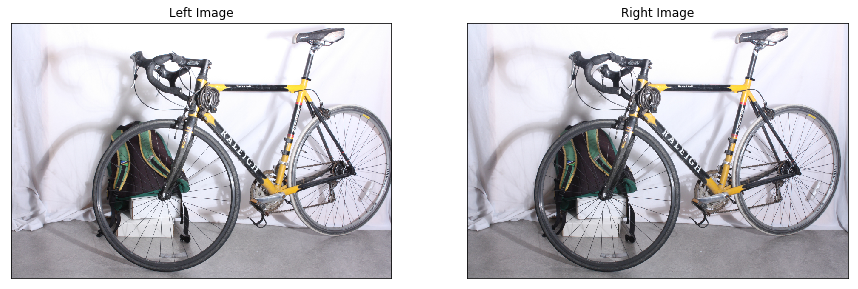

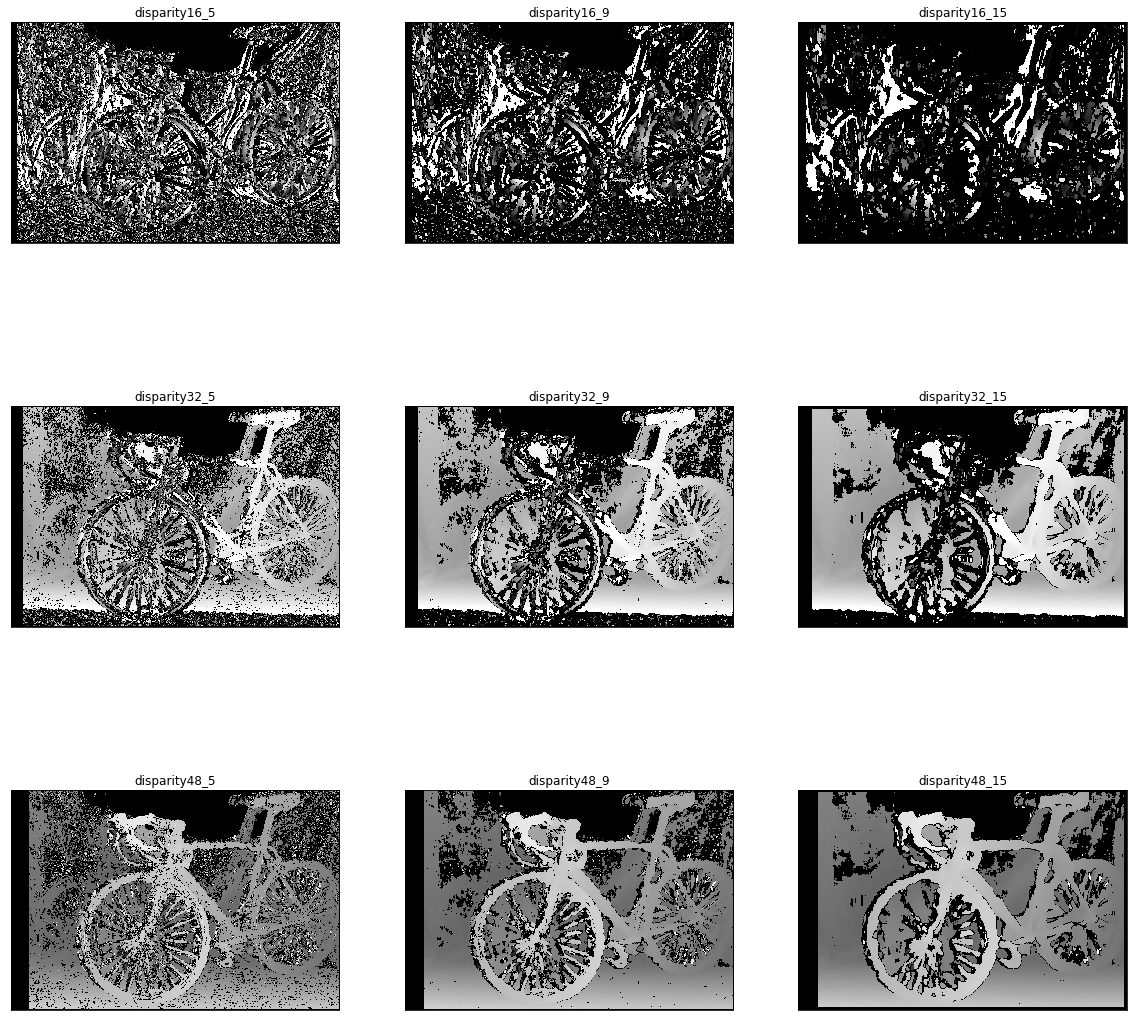

In [3]:
#load depth images

#Load image
imgL = "./im0.png"
imgL = cv2.imread(imgL)
imgR = "./im1.png"
imgR = cv2.imread(imgR)


# resize images for fast processing
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)

# convert to grayscale
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

def disparitymap(numDisparities, blockSize):
    
    stereo = cv2.StereoBM_create(numDisparities, blockSize)
    disparity = stereo.compute(imgL_gray, imgR_gray)
    return disparity

#compute disparity maps
disparity16_5 = disparitymap(16, 5)
disparity16_9 = disparitymap(16,9)
disparity16_15 = disparitymap(16,15)

disparity32_5 = disparitymap(32, 5)
disparity32_9 = disparitymap(32,9)
disparity32_15 = disparitymap(32,15)

disparity48_5 = disparitymap(48, 5)
disparity48_9 = disparitymap(48,9)
disparity48_15 = disparitymap(48,15)



# display images before disparity map
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])



# display images all results
plt.figure(figsize=(20,20))
plt.subplot(331), plt.imshow(disparity16_5, cmap = "gray")
plt.title("disparity16_5"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(disparity16_9, cmap = "gray")
plt.title("disparity16_9"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(disparity16_15, cmap = "gray")
plt.title("disparity16_15"), plt.xticks([]), plt.yticks([])

plt.subplot(334), plt.imshow(disparity32_5, cmap = "gray")
plt.title("disparity32_5"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(disparity32_9, cmap = "gray")
plt.title("disparity32_9"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(disparity32_15, cmap = "gray")
plt.title("disparity32_15"), plt.xticks([]), plt.yticks([])

plt.subplot(337), plt.imshow(disparity48_5, cmap = "gray")
plt.title("disparity48_5"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(disparity48_9, cmap = "gray")
plt.title("disparity48_9"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(disparity48_15, cmap = "gray")
plt.title("disparity48_15"), plt.xticks([]), plt.yticks([])
plt.show()



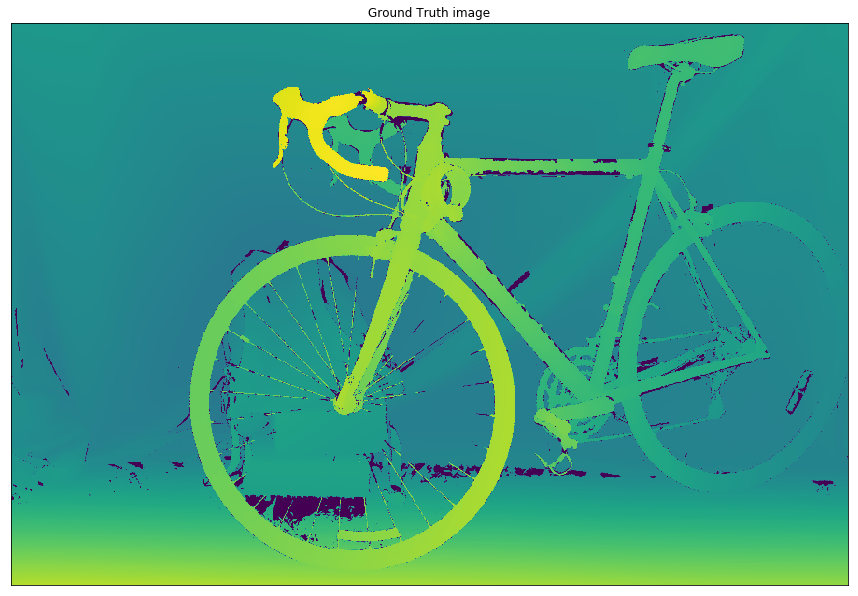

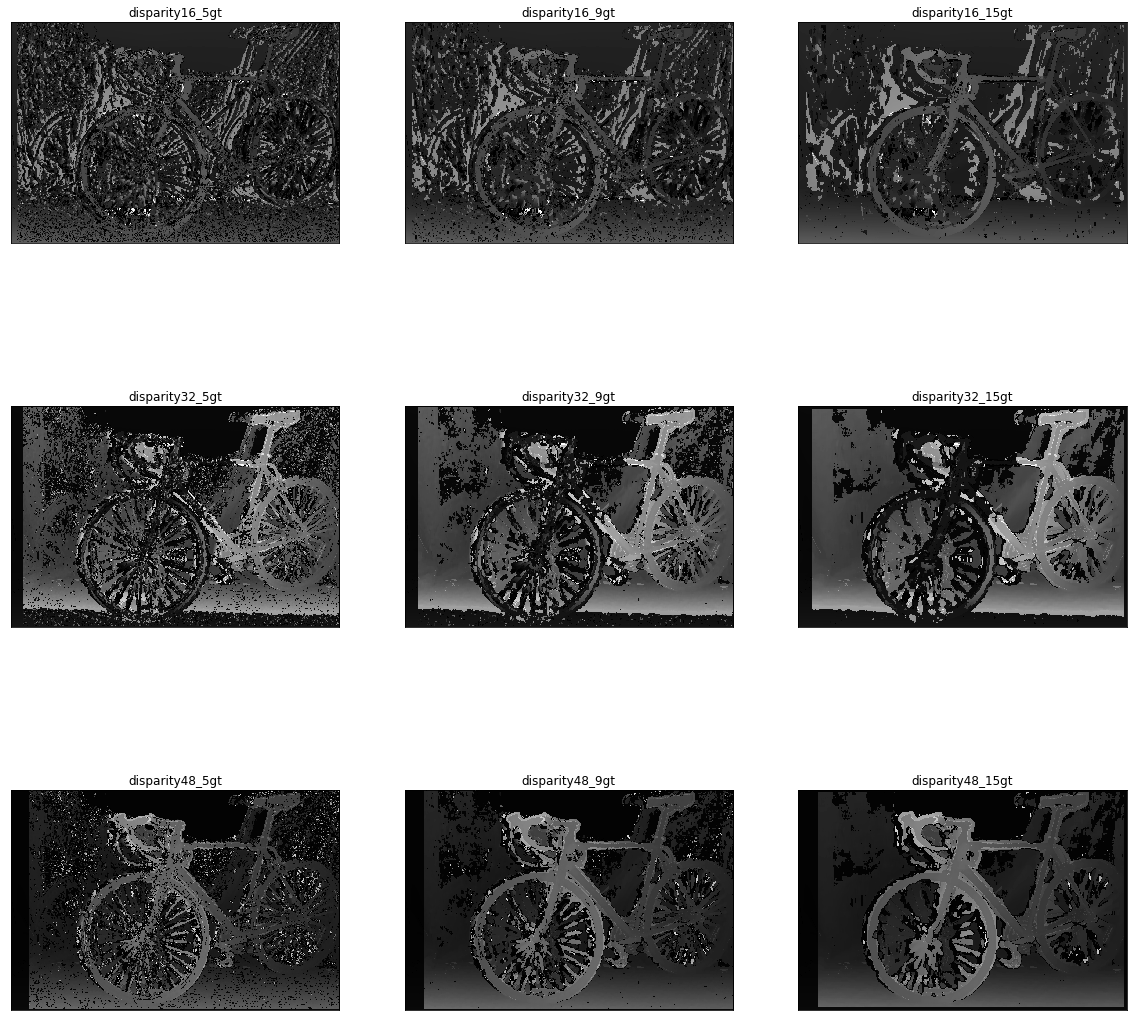

In [7]:
# load left and right images
groundtruth = read_pfm("disp0.pfm")
# groundtruth = read_pfm("disp1.pfm")
groundtruth[groundtruth==np.inf] = 0

# resize the ground truth image
groundtruth = cv2.resize(groundtruth, None, fx=0.3, fy=0.3)

#function to compute mse for each map
def mse(disparityimg, groundtruthimg):
    x = (((disparityimg - groundtruthimg)**2))
    return x

#call function to compute mse for all images
disparity16_5gt = mse(disparity16_5, groundtruth)
disparity16_9gt = mse(disparity16_9, groundtruth)
disparity16_15gt = mse(disparity16_15, groundtruth)

disparity32_5gt = mse(disparity32_5, groundtruth)
disparity32_9gt = mse(disparity32_9, groundtruth)
disparity32_15gt = mse(disparity32_15, groundtruth)

disparity48_5gt = mse(disparity48_5, groundtruth)
disparity48_9gt = mse(disparity48_9, groundtruth)
disparity48_15gt = mse(disparity48_15, groundtruth)
    
plt.figure(figsize=(15,15))
plt.imshow(groundtruth)
plt.title('Ground Truth image'), plt.xticks([]), plt.yticks([])

#plot    
plt.figure(figsize=(20,20))
plt.subplot(331), plt.imshow(disparity16_5gt, cmap = "gray")
plt.title("disparity16_5gt"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(disparity16_9gt, cmap = "gray")
plt.title("disparity16_9gt"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(disparity16_15gt, cmap = "gray")
plt.title("disparity16_15gt"), plt.xticks([]), plt.yticks([])

plt.subplot(334), plt.imshow(disparity32_5gt, cmap = "gray")
plt.title("disparity32_5gt"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(disparity32_9gt, cmap = "gray")
plt.title("disparity32_9gt"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(disparity32_15gt, cmap = "gray")
plt.title("disparity32_15gt"), plt.xticks([]), plt.yticks([])

plt.subplot(337), plt.imshow(disparity48_5gt, cmap = "gray")
plt.title("disparity48_5gt"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(disparity48_9gt, cmap = "gray")
plt.title("disparity48_9gt"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(disparity48_15gt, cmap = "gray")
plt.title("disparity48_15gt"), plt.xticks([]), plt.yticks([])
plt.show()



Comment on the error-maps for each combination of parameters. Specif-
ically, mention the eects of varying the parameters on the error in the
region of high/low texture, edge, large/small depths. (6 points)

By varying the numdisparities, which is the first number in the output image, it can be shown that as the number of disparities increases, this helps demonstrate the depth of the image. For disp = 16 (first row), the picture looks kind of flat, but as it increases to 48 (third row), you can see there more of a color change from the back tire to the front tire showing greater depth. There is a small increase in higher texture as well as the depth is increased. 

Now for blocksize; as the blocksize increases, the amount of noise in the image was greatly decreased. This is shown by the edges being way more obvious and pronoucned in the 3rd column compared to in the first column. The result is way smoother at the end as well.

To conlcude from the 9 images above, as the number of disparities increased the image did get better, but for blocksize, a bigger blocksize does not mean a better image. So the blocksize should be limited but increased and numdisparities should be increased.